In [4]:
import geopandas
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Path to the file | Ruta al archivo

data_folder = Path(".") / "bases"

In [8]:
# Open the file | Abrimos el archivo

data = geopandas.read_file(data_folder / "paises5.shp")

In [13]:
print(data.head())

   asap1_id      name1  name1_shr     name0  asap0_id name0_shr  km2_tot  \
0        11      Canar      Canar   Ecuador        83   Ecuador     3146   
1       916  Magdalena  Magdalena  Colombia       192  Colombia    22021   
2       928      Cesar      Cesar  Colombia       192  Colombia    22936   
3       935    Bolivar    Bolivar  Colombia       192  Colombia    26010   
4       940  Antioquia  Antioquia  Colombia       192  Colombia    63192   

   km2_crop  km2_range  an_crop  ...  selsend  selsaltitu  selstessel  \
0       738       1143        1  ...     None        None          -1   
1      1897      10666        1  ...     None        None          -1   
2      4589       9592        1  ...     None        None          -1   
3      1451       8356        1  ...     None        None          -1   
4      4739       7265        1  ...     None        None          -1   

  selsextrud selsvisibi  selsdrawOr selsicon log_inmig proporcion  \
0          0         -1        None

In [14]:
data.columns

Index(['asap1_id', 'name1', 'name1_shr', 'name0', 'asap0_id', 'name0_shr',
       'km2_tot', 'km2_crop', 'km2_range', 'an_crop', 'an_range', 'water_lim',
       'ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1',
       'NL_NAME_1', 'VARNAME_1', 'layer', 'path', 'CONT', 'JOIN_ID', 'NODE',
       'pob', 'MIGIJ_Mest', 'MIGIJ_Fest', 'MIGIJ_Me_1', 'MIGIJ_Fe_1', 'inmig',
       'inm_p', 'emig', 'fundmean', 'ntltrendme', 'tempmean', 'precipmean',
       'ntl_hab', 'ex_dens', 'preciprang', 'asap1_id_2', 'x', 'y', 'net',
       'ab_exotica', 'spp_ex', 'altmean', '_altstdev', 'ab_nativas', 'spp_nat',
       'selsName', 'selsdescri', 'selstimest', 'selsbegin', 'selsend',
       'selsaltitu', 'selstessel', 'selsextrud', 'selsvisibi', 'selsdrawOr',
       'selsicon', 'log_inmig', 'proporcion', 'geometry'],
      dtype='object')

In [5]:
import seaborn as sns

In [16]:
df = data['inmig']

import numpy as np
scaled_mat = (df - np.min(df))/ (np.max(df) - np.min(df)) 

Text(0, 0.5, 'Number of immigrants')

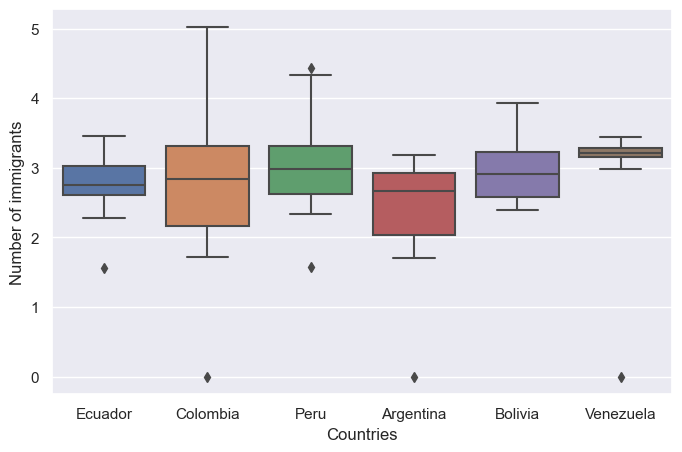

In [20]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.boxplot(x=data["name0"], y = data['log_inmig'], dodge=False)
#ax.set_ylim([-0.01, 0.02])
plt.xlabel('Countries')
plt.ylabel('Number of immigrants')

Text(0, 0.5, 'NTL trends')

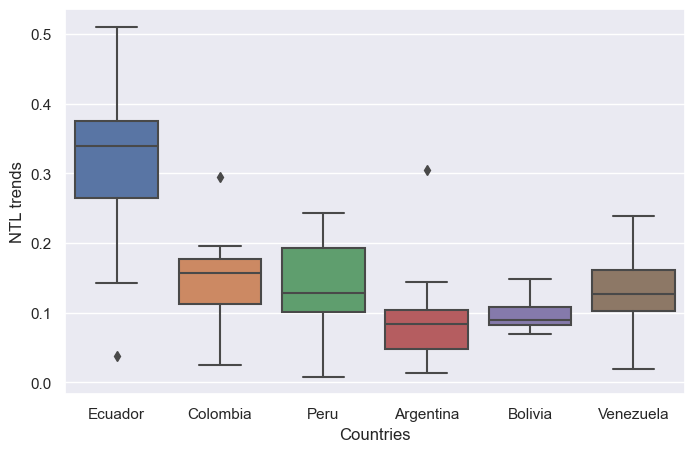

In [9]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.boxplot(x=data["name0"], y = data['ntltrendme'], dodge=False)
#ax.set_ylim([-0.01, 0.02])
plt.xlabel('Countries')
plt.ylabel('NTL trends')

In [21]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
south_america = world[world["continent"] == "South America"]

In [22]:
import mapclassify

In [219]:
data['ex_dens'] = data['sp_ex']/data['km2_tot']

In [84]:
data['inmig2'] = pd.to_numeric(data['inmig'], downcast='integer')
print(data['inmig'])

0       188
1      1329
2      1561
3       117
4      2082
       ... 
101    1965
102    2908
103       0
104       0
105       0
Name: inmig, Length: 106, dtype: int32


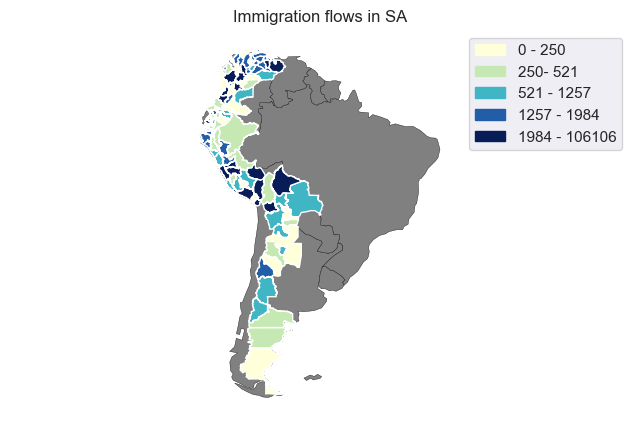

In [23]:
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
base = south_america.plot(edgecolor='black', color='grey',linewidth=0.25)
pl = data.plot(column= data['inmig'] , cmap='YlGnBu', scheme='quantiles', ax = base, legend=True, figsize=(15, 40))
pl.set(title='Immigration flows in SA')
pl.set_axis_off();
plt.axis('equal')

cmap = cm.get_cmap('YlGnBu')
white_patch = mpatches.Patch(color=cmap(0.0), label='0 - 250')
lowblue_patch = mpatches.Patch(color=cmap(0.25), label='250- 521')
midblue_patch = mpatches.Patch(color=cmap(0.5), label='521 - 1257')
highblue_patch = mpatches.Patch(color=cmap(0.75), label='1257 - 1984')
veryblue_patch = mpatches.Patch(color=cmap(1.0), label='1984 - 106106')
plt.legend(handles=[white_patch, lowblue_patch, midblue_patch, highblue_patch, veryblue_patch])

plt.show()

In [265]:
data['net_hab'] = data['net']/ data['TP']

In [38]:
df = data['inmig']

In [39]:
import numpy as np
scaled_mat = (df - np.min(df))/ (np.max(df) - np.min(df)) 

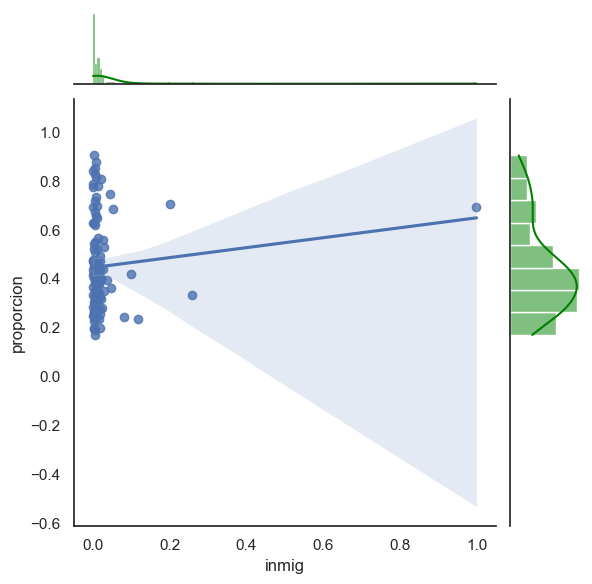

In [41]:
sns.set(style = "white", color_codes=True)
ax = sns.jointplot(data=data, x= scaled_mat, y= 'proporcion' , kind="reg", marginal_kws={'color': 'green'})
#ax.set_axis_labels('Mean precipitation (mm, scaled)','Exotic trees proportion', fontsize=14)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inmig', ylabel='proporcion'>

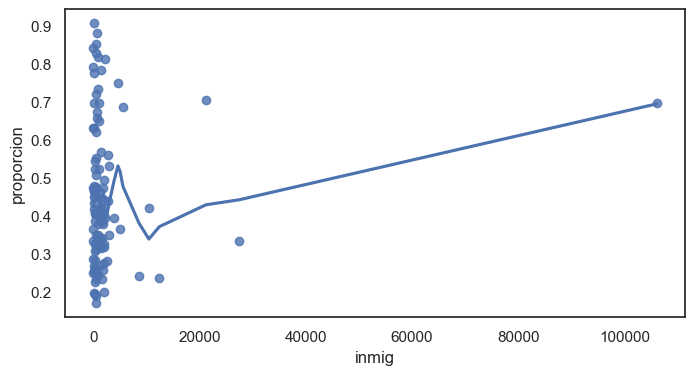

In [42]:
x = data['fundmean']
y = data['proporcion']
sns.set(style = "white", color_codes=True)
sns.regplot(df, y, lowess=True)

In [227]:

data = pd.read_csv(data_folder / "paises3.csv")

In [143]:
import numpy as np

features = ['fundmean', 'precipmean']
target = 'ex_dens'

X = data[features].values.reshape(-1, len(features))
y = data[target].values


In [147]:
import numpy as np

features = ['tempmean', 'precipmean','net', 'ntl_hab']
target = 'ex_dens'

X = data[features].values.reshape(-1, len(features))
y = data[target].values

In [148]:
print(X.shape)
print(y.shape)

(106, 4)
(106,)


In [149]:
from sklearn import linear_model

reg = linear_model.LinearRegression()  
reg.fit(X, y)  

LinearRegression()

In [150]:
predicted = model.predict(X)

In [85]:
print(predicted)

[0.54503646 0.36187689 0.3618659  0.32341656 0.29610306 0.07464324
 0.23797921 0.19965416 0.42811564 0.42345443 0.34520406 0.5794534
 0.32267703 0.3315044  0.32355761 0.36248753 0.51126319 0.54427086
 0.32759216 0.28346299 0.39804152 0.61706532 0.48813388 0.48517956
 0.33100159 0.46736384 0.52212804 0.32175344 0.33939801 0.46360228
 0.50374852 0.24170892 0.43089337 0.10401998 0.40113709 0.59912121
 0.37976748 0.58565069 0.52731097 0.41845346 0.47649546 0.6697252
 0.66141669 0.5156848  0.40030893 0.3127925  0.42067794 0.37635383
 0.32643682 0.44708195 0.45080704 0.34846601 0.33863752 0.38591156
 0.445399   0.31882531 0.43579164 0.35335001 0.65724561 0.56286192
 0.47909378 0.49100459 0.62418303 0.34295889 0.21832347 0.26176426
 0.29000577 0.53811403 0.63103199 0.63871288 0.5794437  0.6055907
 0.50117243 0.38282083 0.49903382 0.58518549 0.47473095 0.46992547
 0.52494281 0.69237523 0.65656525 0.49284009 0.67294977 0.62458766
 0.65701866 0.75724521 0.32070873 0.69173322 0.56842884 0.7712062

In [151]:
x = data['fundmean']
y = data['inmig']

In [154]:
import statsmodels.api as sm
z = sm.nonparametric.lowess(y , x, frac= 1./6, it=3)

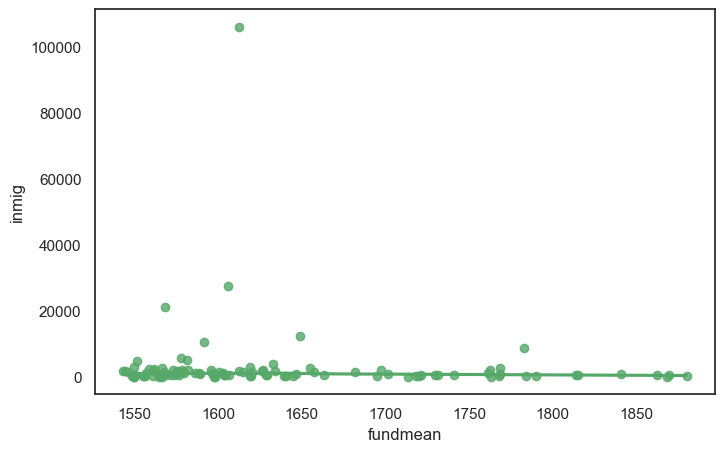

In [155]:
sns.set(style = "white", color_codes=True)
ax = sns.regplot(x , y, lowess =True, color="g")
#ax.set_xlabel("Net Migration flow")
#ax.set_ylabel("Proportion of exotic trees")

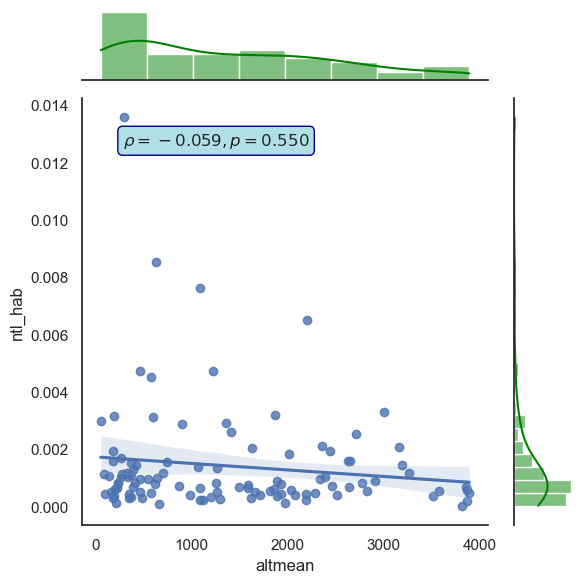

In [159]:
import scipy.stats as stats

sns.set(style = "white", color_codes=True)
ax = sns.jointplot(data=data, x= 'altmean', y= 'ntl_hab' , kind="reg", marginal_kws={'color': 'green'})
r, p = stats.pearsonr(x, y)
ax.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
#ax.set_axis_labels('NTL trend','Age', fontsize=14)
plt.tight_layout()
plt.show()

In [156]:
x = data['inmig']
y = data['fundmean']
import statsmodels.api as sm
z = sm.nonparametric.lowess(y , x, frac= 1./20, it=10)

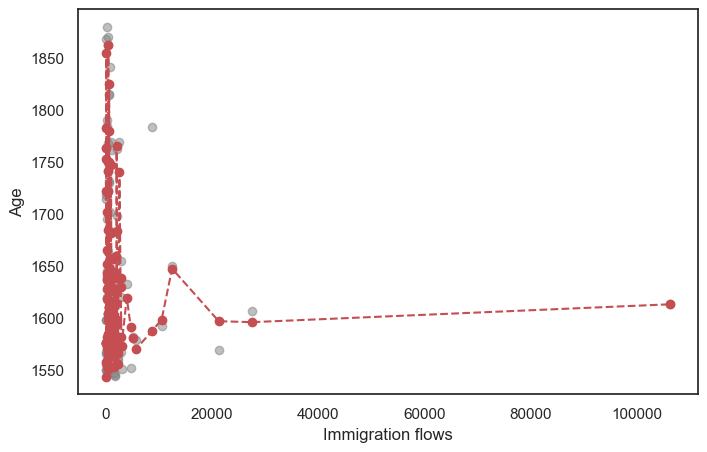

In [158]:
sns.set(style = "white", color_codes=True)
plt.scatter(x, y , marker='o', color = "grey", alpha= 0.5)
plt.plot(z[:,0], z[:,1], 'ro--')
plt.xlabel('Immigration flows')
plt.ylabel('Age')
plt.show()

In [ ]:
####CORRPLOT

Pearson correlation coefficient matrix for each independent variable: 
             tempmean  preciprang     inmig   ntl_hab  fundmean  ntltrendme
tempmean    1.000000    0.126069 -0.051501 -0.124259  0.097399    0.000141
preciprang  0.126069    1.000000  0.130152  0.045052  0.087334   -0.162014
inmig      -0.051501    0.130152  1.000000  0.051978 -0.058767    0.011276
ntl_hab    -0.124259    0.045052  0.051978  1.000000  0.430696    0.073122
fundmean    0.097399    0.087334 -0.058767  0.430696  1.000000   -0.291318
ntltrendme  0.000141   -0.162014  0.011276  0.073122 -0.291318    1.000000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6324\2032143844.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  masking = np.zeros_like(corr, dtype = np.bool)


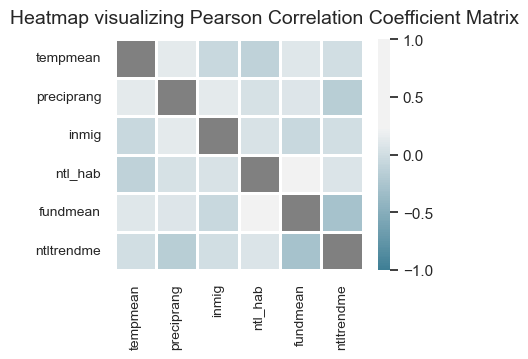

In [131]:
# Visualizing multicollinearity between independent features using a heatmap  
  
corr = data[ ['tempmean', 'preciprang','inmig', 'ntl_hab', 'fundmean', 'ntltrendme']].corr()  
print('Pearson correlation coefficient matrix for each independent variable: \n', corr)  
  
# Masking the diagonal cells   
masking = np.zeros_like(corr, dtype = np.bool)  
np.fill_diagonal(masking, val = True)  
  
# Initializing a matplotlib figure  
figure, axis = plt.subplots(figsize = (4, 3))  
  
# Generating a custom colormap  
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
c_map.set_bad('grey')  
  
# Displaying the heatmap with the masking and the correct aspect ratio  
sns.heatmap(corr, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  